In [1]:
import pickle
import pandas as pd

route_id_dict = pickle.load( open( "route_table.p", "rb" ) )
user_id_dict = pickle.load( open( "user_table.p", "rb" ) )

user_ids = []
frames = []

for user_id, d in user_id_dict.items():
    user_ids.append(user_id)
    frames.append(pd.DataFrame.from_dict(d, orient='index'))

df = pd.concat(frames, keys=user_ids)

In [3]:
df2 = df.unstack(level=-1)
df3 = df2[0]
#df4 = df3.reset_index()
#df4.rename(columns={'index':'user_id'}, inplace=True)
df3.index.name = 'user_id'
df_users = df3
df_users.head()

,105721981,105734567,105734570,105734573,105734576,105734579,105734582,105734585,105734588,105734591,...,117733373,117733756,117734030,117734052,117734062,117743654,117743720,117743731,117743789,117751232
user_id,,,,,,,,,,,,,,,,,,,,,
200188503,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110146121,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113169920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111961457,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200196308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


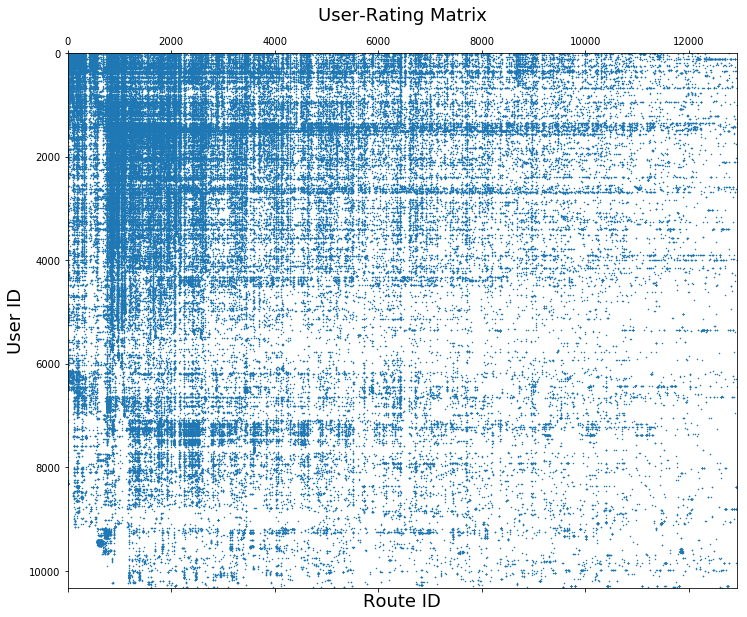

In [4]:
import numpy as np
import matplotlib.pyplot as plt

user_rating_mat = df_users.to_numpy().copy()
user_rating_mat[np.isnan(user_rating_mat)] = 0.0

fig = plt.figure(figsize=(12,10))
plt.spy(user_rating_mat,markersize=0.5)
plt.xlabel('Route ID',fontsize=18)
plt.ylabel('User ID',fontsize=18)
plt.title('User-Rating Matrix',fontsize=18)
plt.rcParams['xtick.labelsize']=14
plt.rcParams['ytick.labelsize']=14
#fig.savefig('sparsity.png') # Use fig. here
plt.show()

In [5]:
## get users who rated at least n=15 routes
ind_users_at_least20 = []

dim = user_rating_mat.shape
for u in range(dim[0]):
    n = len(user_rating_mat[u,:].nonzero()[0])
    if n >= 15:
        ind_users_at_least20.append(u)
        
print(df_users.index[ind_users_at_least20])

df_users_at_least20 = df_users.loc[df_users.index[ind_users_at_least20]]

Int64Index([110146121, 113169920, 111961457, 200243983, 200077815, 200243073,
            107633218, 200128311, 111161104, 111236373,
            ...
            106712356, 108337488, 106540415, 107714695, 110037249, 200229348,
            106283059, 200092852, 107816236, 106701682],
           dtype='int64', name='user_id', length=2447)


In [6]:
df20=df_users_at_least20.stack()
df20 = df20.reset_index()
df20.columns = ['user_id','route_id','rating']
df20

,user_id,route_id,rating
0,110146121,105734567,3.0
1,110146121,105734594,2.0
2,110146121,105734603,4.0
3,110146121,105734615,2.0
4,110146121,105734618,1.0
5,110146121,105734630,2.0
6,110146121,105734633,4.0
7,110146121,105734651,3.0
8,110146121,105734654,3.0
9,110146121,105734660,1.0


In [66]:
from surprise import BaselineOnly
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from surprise import SVD
from surprise import SVDpp
from surprise.model_selection import train_test_split

# A reader is still needed but only the rating_scale param is requiered.
reader = Reader(rating_scale=(1, 4))

# The columns must correspond to user id, item id and ratings (in that order).
data = Dataset.load_from_df(df20[['user_id', 'route_id', 'rating']], reader)


# Evaluate performances of our algorithm on the dataset.
trainset, testset = train_test_split(data, test_size=.25)

# We'll use the famous SVD algorithm.
algo = SVDpp(n_factors=20)

# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
predictions = algo.test(testset)

# Then compute RMSE
accuracy.rmse(predictions)

RMSE: 0.6350


0.6350115992810393

The SVD had an RMSE of about 0.65.  Let's see what SVDpp is... (UPDATE: SVDpp performs better)

In [67]:
from surprise import BaselineOnly
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from surprise import SVD
from surprise import SVDpp
from surprise.model_selection import train_test_split

# A reader is still needed but only the rating_scale param is requiered.
reader = Reader(rating_scale=(1, 4))

# The columns must correspond to user id, item id and ratings (in that order).
data = Dataset.load_from_df(df20[['user_id', 'route_id', 'rating']], reader)

# Retrieve the trainset.
trainset = data.build_full_trainset()

# Build an algorithm, and train it.
algo_full = SVDpp(n_factors=20)
algo_full.fit(trainset)

In [10]:
from collections import defaultdict

def get_top_n(uid, predictions, n=10):
    '''Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    '''

    # First map the predictions to each user.
    top_n = []
    #for uid, iid, true_r, est, _ in predictions:
    #    top_n[uid].append((iid, est))
    nn = len(predictions)
    for i in range(nn):
        if predictions[i].uid == uid:
            top_n.append((predictions[i].iid, predictions[i].est))
    
    # Then sort the predictions for each user and retrieve the k highest ones.
    #for uid, user_ratings in top_n.items():
    #    user_ratings.sort(key=lambda x: x[1], reverse=True)
    #    top_n[uid] = user_ratings[:n]
    top_n.sort(key = lambda x: x[1])  
    top_n = top_n[:n]

    return top_n

In [59]:
# Than predict ratings for all pairs (u, i) that are NOT in the training set.
testset = trainset.build_anti_testset()

In [68]:
iid = df20['route_id'].unique()
iid_me = df20.loc[df20['user_id']==200128311,'user_id']
iids_to_pred = np.setdiff1d(iid,iid_me)

In [69]:
testset = [[200128311,iid,2] for iid in iids_to_pred]
predictions = algo_full.test(testset)
predictions

[Prediction(uid=200128311, iid=105721981, r_ui=2, est=3.187923413427582, details={'was_impossible': False}),
 Prediction(uid=200128311, iid=105734567, r_ui=2, est=2.6417070483748346, details={'was_impossible': False}),
 Prediction(uid=200128311, iid=105734570, r_ui=2, est=2.316892397326023, details={'was_impossible': False}),
 Prediction(uid=200128311, iid=105734573, r_ui=2, est=3.0938238324980887, details={'was_impossible': False}),
 Prediction(uid=200128311, iid=105734576, r_ui=2, est=2.861367654953998, details={'was_impossible': False}),
 Prediction(uid=200128311, iid=105734579, r_ui=2, est=2.840635752491277, details={'was_impossible': False}),
 Prediction(uid=200128311, iid=105734582, r_ui=2, est=2.7265355537294402, details={'was_impossible': False}),
 Prediction(uid=200128311, iid=105734585, r_ui=2, est=2.5163368264636854, details={'was_impossible': False}),
 Prediction(uid=200128311, iid=105734588, r_ui=2, est=2.439267302231893, details={'was_impossible': False}),
 Prediction(uid

In [70]:
pred_ratings = np.array([pred.est for pred in predictions])

i_max = np.argpartition(pred_ratings,-10)[-10:]

i_max = i_max[np.argsort(-pred_ratings[i_max])]

iid = iids_to_pred[i_max]

In [71]:
#print(iid,pred_ratings[i_max])
df_top_climbs=pd.DataFrame(iid,pred_ratings[i_max])
df_top_climbs = df_top_climbs.reset_index()

In [72]:
df_top_climbs.columns=['predicted rating','route id']
df_top_climbs

,predicted rating,route id
0,3.971786,106129151
1,3.928706,105863822
2,3.918889,105874590
3,3.899727,105845493
4,3.885682,105924807
5,3.883560,105877171
6,3.880573,105967548
7,3.871251,106783145
8,3.870789,106022301
9,3.870573,105862944
